In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas
import numpy
from tensorflow.keras import datasets, layers, models


In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
print (x_train.shape)
print (x_test.shape)


170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
y_train.shape
#flattening y_train
y_train= y_train.reshape(-1,)
y_train.shape
y_test.reshape(-1,)
print (y_train[:5])



[6 9 9 4 1]


In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

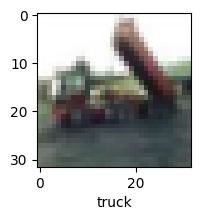

In [5]:
def sample_plot(X,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

sample_plot(x_train,y_train,2)

In [6]:
#scaling the training data
x_train = x_train/255
x_test = x_test/255
x_test[:2]

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [7]:
#building a basic ann
ann = models.Sequential([
    layers.Flatten(input_shape =(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])
ann.compile(optimizer = 'SGD',
     loss = 'sparse_categorical_crossentropy',
     metrics = ['accuracy'])
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 10s 5ms/step - loss: 1.8145 - accuracy: 0.3524
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6225 - accuracy: 0.4277
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5403 - accuracy: 0.4574
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4821 - accuracy: 0.4763
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4315 - accuracy: 0.4973


313/313 [==============================] - 1s 2ms/step
clasification report :               precision    recall  f1-score   support

           0       0.63      0.38      0.47      1000
           1       0.71      0.43      0.54      1000
           2       0.36      0.40      0.38      1000
           3       0.40      0.19      0.26      1000
           4       0.48      0.39      0.43      1000
           5       0.36      0.43      0.39      1000
           6       0.44      0.66      0.53      1000
           7       0.42      0.69      0.52      1000
           8       0.54      0.71      0.61      1000
           9       0.62      0.44      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



<Axes: >

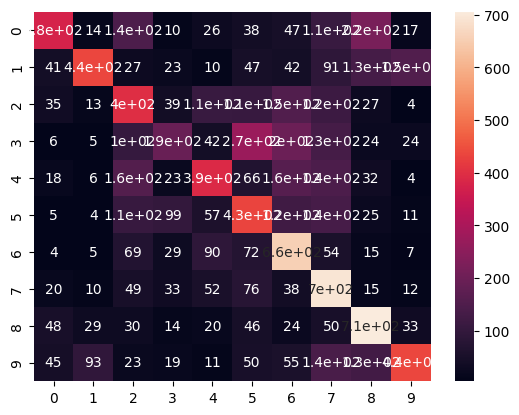

In [8]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict (x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('clasification report :',classification_report(y_test,y_pred_classes))
import seaborn as sn
confusionMmatrix = confusion_matrix(y_test,y_pred_classes)
sn.heatmap(confusionMmatrix, annot=True)



In [14]:
#building the cnn now.
cnn = models.Sequential ([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu' , input_shape =(32, 32,3) ),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size =(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=128,kernel_size =(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])
cnn.compile (optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy']
             )
cnn.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 9s 4ms/step - loss: 1.4857 - accuracy: 0.4599
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1192 - accuracy: 0.6071
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9465 - accuracy: 0.6707
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8448 - accuracy: 0.7072
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7638 - accuracy: 0.7322
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7017 - accuracy: 0.7549
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6467 - accuracy: 0.7767
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5991 - accuracy: 0.7898
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5482 - accuracy: 0.8081
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.510

In [18]:
#hense our convolutional layer obtains a accuracy of over
cnn.evaluate(x_test,y_test)


313/313 [==============================] - 2s 4ms/step - loss: 0.9270 - accuracy: 0.7046


[0.9270462989807129, 0.7045999765396118]

In [28]:
y_pred = cnn.predict (x_test)
y_classes = [classes[np.argmax(ele)] for ele in y_pred]

y_classes[:10]

313/313 [==============================] - 1s 2ms/step


['dog',
 'ship',
 'truck',
 'airplane',
 'frog',
 'frog',
 'dog',
 'frog',
 'cat',
 'truck']

In [29]:
y_test[:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [30]:
#cnn model generates accuracy of around 70% on new samples, much bettr then ann.